<a href="https://colab.research.google.com/github/anikethbabu/DTSC_1302_Group_Project/blob/main/Colab_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

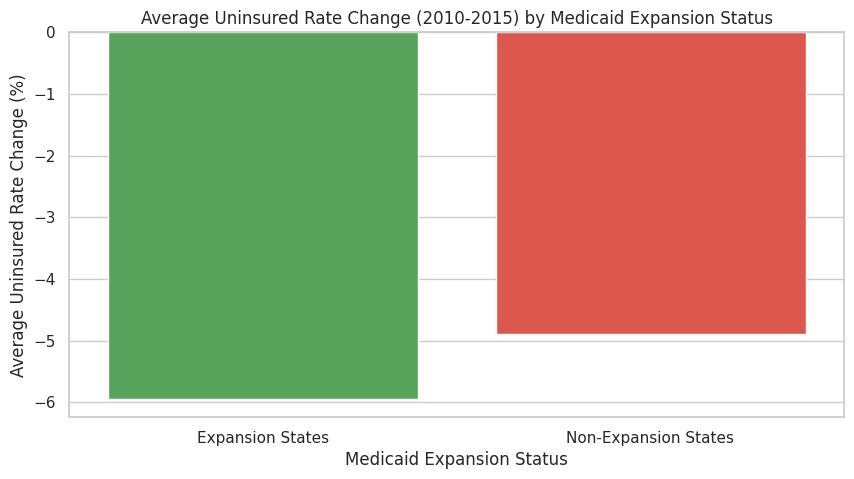

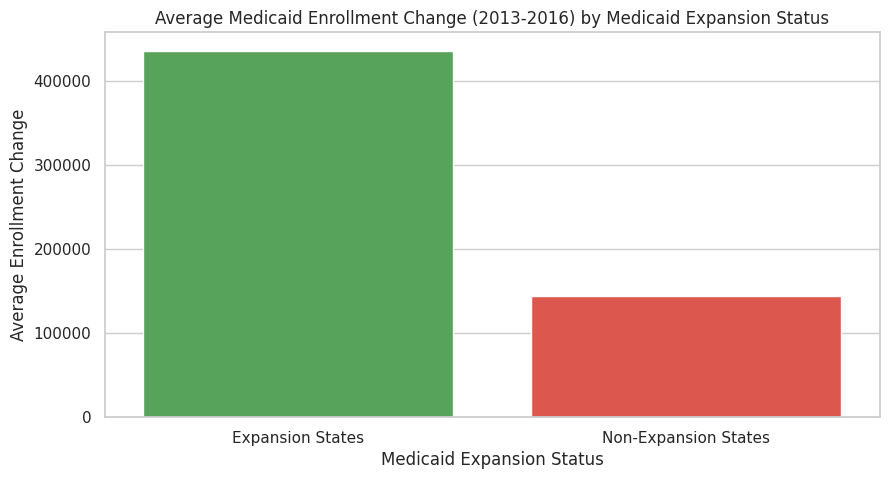

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/anikethbabu/DTSC_1302_Group_Project/refs/heads/main/Health_Insurance_In_States.csv"
df = pd.read_csv(url)
df = df.dropna()

# Setting a theme for better visuals
sns.set_theme(style="whitegrid")

# Separate Medicaid expansion and non-expansion states
expansion_states = df[df['State Medicaid Expansion (2016)'] == True]
non_expansion_states = df[df['State Medicaid Expansion (2016)'] == False]

# Calculate the mean uninsured rate change for each group (2010-2015)
expansion_uninsured_rate_change = expansion_states['Uninsured Rate Change (2010-2015)'].str.replace('%',"").astype('float').mean()
non_expansion_uninsured_rate_change = non_expansion_states['Uninsured Rate Change (2010-2015)'].str.replace('%',"").astype('float').mean()

# Calculate Medicaid enrollment change for each group (2013-2016)
expansion_medicaid_enrollment_change = expansion_states['Medicaid Enrollment Change (2013-2016)'].mean()
non_expansion_medicaid_enrollment_change = non_expansion_states['Medicaid Enrollment Change (2013-2016)'].mean()

# Plot uninsured rate change (2010-2015) comparison
plt.figure(figsize=(10, 5))
sns.barplot(
    x=['Expansion States', 'Non-Expansion States'],
    y=[expansion_uninsured_rate_change, non_expansion_uninsured_rate_change],
    hue = ['Expansion States', 'Non-Expansion States'],
    palette=['#4caf50', '#f44336']
)
plt.title("Average Uninsured Rate Change (2010-2015) by Medicaid Expansion Status")
plt.ylabel("Average Uninsured Rate Change (%)")
plt.xlabel("Medicaid Expansion Status")
plt.show()

# Plot Medicaid enrollment change (2013-2016) comparison
plt.figure(figsize=(10, 5))
sns.barplot(
    x=['Expansion States', 'Non-Expansion States'],
    y=[expansion_medicaid_enrollment_change, non_expansion_medicaid_enrollment_change],
    hue = ['Expansion States', 'Non-Expansion States'],
    palette=['#4caf50', '#f44336']
)
plt.title("Average Medicaid Enrollment Change (2013-2016) by Medicaid Expansion Status")
plt.ylabel("Average Enrollment Change")
plt.xlabel("Medicaid Expansion Status")
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Load and clean data
url = "https://raw.githubusercontent.com/anikethbabu/DTSC_1302_Group_Project/refs/heads/main/Health_Insurance_In_States.csv"
df = pd.read_csv(url)
df = df.dropna()

# Convert percentage strings to float
df['Uninsured Rate Change (2010-2015)'] = df['Uninsured Rate Change (2010-2015)'].str.replace('%', '').astype(float)

# Encode categorical variable (Medicaid Expansion)
df['State Medicaid Expansion (2016)'] = df['State Medicaid Expansion (2016)'].astype(int)

# Define features (X) and target (y)
X = df[['State Medicaid Expansion (2016)', 'Medicaid Enrollment Change (2013-2016)']]
y = df['Uninsured Rate Change (2010-2015)']

# Add Polynomial Features and Scaling to the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
pipeline.fit(X_train, y_train)

# Predict on Test Set
y_pred = pipeline.predict(X_test)

# Cross-Validation Scores
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) on Test Set: {r2}")
print(f"Average Cross-Validated R2: {cv_scores.mean()}")

# Feature Interpretation
coefficients = pipeline.named_steps['model'].coef_
intercept = pipeline.named_steps['model'].intercept_

print("Model Coefficients (with Polynomial Terms):", coefficients)
print("Model Intercept:", intercept)


Mean Absolute Error (MAE): 1.4392242506989565
R-squared (R2) on Test Set: 0.1246135223835586
Average Cross-Validated R2: -181.39733566531038
Model Coefficients (with Polynomial Terms): [ 0.04926306 -2.68885502 -0.02896543  0.32575079  0.30713327]
Model Intercept: -6.002679347740136


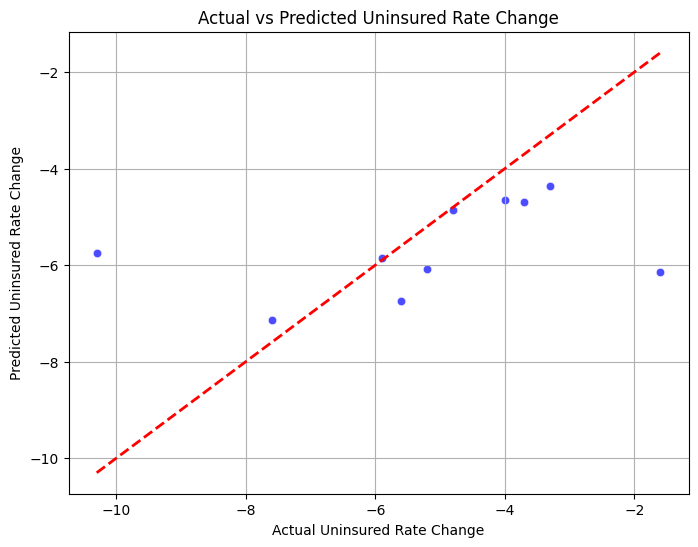

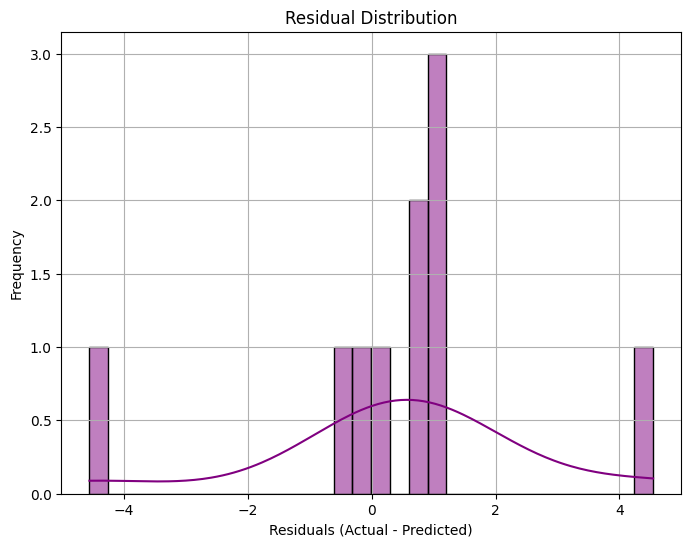

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted Uninsured Rate Change")
plt.xlabel("Actual Uninsured Rate Change")
plt.ylabel("Predicted Uninsured Rate Change")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
